# Variational Circuit Map Fitting

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
def spectrum_pipeline(model, data, num_iter_spam, num_iter_map, N=None):
    d = model.channel.d
    channel = model.channel
    spam = channel.spam
    
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                  num_iter = 300,
                  verbose = False,
                  )
    
    spam.train(inputs = inputs_spam,
               targets = targets_spam,
               num_iter = num_iter_spam,
               verbose = False,
              )
    
    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = num_iter_map,
                )
    
    spectrum = channel_spectrum(channel)

    t = np.linspace(0, 2*np.pi, 100)
    circle = [np.sin(t), np.cos(t)]
    
    return spectrum, circle, model


## Three Qubit 

## Belem

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_PQC_noDelay_belem.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = circuit_to_matrix(pqc_basic(n, 8))

spam = SPAM(d=d, 
            use_corr_mat = True,
            optimizer = tf.optimizers.Adam(learning_rate=0.01),
            )
 
spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                  num_iter = 300,
                  verbose = False,
                  )
    
spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 1000,
           verbose = False,
          )

model_list_1 = []
rank_list = list(range(2, 65))

for i, rank in enumerate(rank_list):
    model = ModelQuantumMap(channel = ExtractedKrausMap(
                                                        d=d, 
                                                        rank=rank,
                                                        ),
                                              loss_function = ProbabilityMSE(),
                                              optimizer = tf.optimizers.Adam(learning_rate=0.01),
                                              logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                                             )
    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = 2000,
               )
 
    if i>0:
        loss =      model.logger.loss_train_list[-1]
        loss_prev = model_list_1[-1].logger.loss_train_list[-1]

        if loss/loss_prev > rank_list[i-1]/rank_list[i]:
            break
            
    model_list_1.append(model)

In [4]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_PQC_5usDelay_belem.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = circuit_to_matrix(pqc_basic(n, 8))

spam = SPAM(d=d, 
            use_corr_mat = True,
            optimizer = tf.optimizers.Adam(learning_rate=0.01),
            )
 
spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                  num_iter = 300,
                  verbose = False,
                  )
    
spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 2000,
           verbose = False,
          )

model_list_2 = []
rank_list = list(range(2, 65))

for i, rank in enumerate(rank_list):
    model = ModelQuantumMap(channel = ExtractedKrausMap(
                                                        d=d, 
                                                        rank=rank,
                                                        ),
                                              loss_function = ProbabilityMSE(),
                                              optimizer = tf.optimizers.Adam(learning_rate=0.01),
                                              logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                                             )
    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = 2000,
               )
 
    if i>0:
        loss =      model.logger.loss_train_list[-1]
        loss_prev = model_list_2[-1].logger.loss_train_list[-1]

        if loss/loss_prev > rank_list[i-1]/rank_list[i]:
            break
            
    model_list_2.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.00924427740800725


  0%|          | 0/2000 [00:00<?, ?it/s]

0.09564680169215423 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.04807237329163236 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.033186321305328406 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.02488696623410625 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.019835758287908803 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.015955289001813873 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01369075456591735 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.012129896017168788 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.011241485279161972 None


In [5]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_PQC_10usDelay_belem.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = circuit_to_matrix(pqc_basic(n, 8))

spam = SPAM(d=d, 
            use_corr_mat = True,
            optimizer = tf.optimizers.Adam(learning_rate=0.01),
            )
 
spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                  num_iter = 300,
                  verbose = False,
                  )
    
spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 2000,
           verbose = False,
          )

model_list_3 = []
rank_list = list(range(2, 65))

for i, rank in enumerate(rank_list):
    model = ModelQuantumMap(channel = ExtractedKrausMap(
                                                        d=d, 
                                                        rank=rank,
                                                        ),
                                              loss_function = ProbabilityMSE(),
                                              optimizer = tf.optimizers.Adam(learning_rate=0.01),
                                              logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                                             )
    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = 2000,
               )
 
    if i>0:
        loss =      model.logger.loss_train_list[-1]
        loss_prev = model_list_3[-1].logger.loss_train_list[-1]

        if loss/loss_prev > rank_list[i-1]/rank_list[i]:
            break
            
    model_list_3.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008008909101219404


  0%|          | 0/2000 [00:00<?, ?it/s]

0.11650928820145891 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.05818890493405448 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.037835460936221636 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.027162964563761306 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.021081395138640904 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01678074977022934 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01420421985070949 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.012236145225425418 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01056559018774927 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.010056031290052725 None


In [6]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_PQC_20usDelay_belem.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = circuit_to_matrix(pqc_basic(n, 8))

spam = SPAM(d=d, 
            use_corr_mat = True,
            optimizer = tf.optimizers.Adam(learning_rate=0.01),
            )
 
spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                  num_iter = 300,
                  verbose = False,
                  )
    
spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 2000,
           verbose = False,
          )

model_list_4 = []
rank_list = list(range(2, 65))

for i, rank in enumerate(rank_list):
    model = ModelQuantumMap(channel = ExtractedKrausMap(
                                                        d=d, 
                                                        rank=rank,
                                                        ),
                                              loss_function = ProbabilityMSE(),
                                              optimizer = tf.optimizers.Adam(learning_rate=0.01),
                                              logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                                             )
    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = 2000,
               )
 
    if i>0:
        loss =      model.logger.loss_train_list[-1]
        loss_prev = model_list_4[-1].logger.loss_train_list[-1]

        if loss/loss_prev > rank_list[i-1]/rank_list[i]:
            break
            
    model_list_4.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.009395626050353432


  0%|          | 0/2000 [00:00<?, ?it/s]

0.2044697101790034 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.09774158296140087 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.06079144861396249 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.040831368165899024 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.028762786632184865 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.02296507933972424 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.019021908936125424 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.015870812501482676 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.013623334226795207 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.011930413368252612 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.010937073372343264 None


In [7]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_PQC_30usDelay_belem.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

U = circuit_to_matrix(pqc_basic(n, 8))

spam = SPAM(d=d, 
            use_corr_mat = True,
            optimizer = tf.optimizers.Adam(learning_rate=0.01),
            )
 
spam.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                  num_iter = 300,
                  verbose = False,
                  )
    
spam.train(inputs = inputs_spam,
           targets = targets_spam,
           num_iter = 2000,
           verbose = False,
          )

model_list_5 = []
rank_list = list(range(2, 65))

for i, rank in enumerate(rank_list):
    model = ModelQuantumMap(channel = ExtractedKrausMap(
                                                        d=d, 
                                                        rank=rank,
                                                        ),
                                              loss_function = ProbabilityMSE(),
                                              optimizer = tf.optimizers.Adam(learning_rate=0.01),
                                              logger = Logger(loss_function = ProbabilityMSE(), verbose=False),
                                             )
    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = 2000,
               )
 
    if i>0:
        loss =      model.logger.loss_train_list[-1]
        loss_prev = model_list_5[-1].logger.loss_train_list[-1]

        if loss/loss_prev > rank_list[i-1]/rank_list[i]:
            break
            
    model_list_5.append(model)

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.008142021008905147


  0%|          | 0/2000 [00:00<?, ?it/s]

0.2949630015782403 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.13012089483422615 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.07760977585252005 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.05386418759194902 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.03927950777245404 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.03138596525931232 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.024437964688106432 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.021049744401292737 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.01758831902461574 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.015727690434969757 None


  0%|          | 0/2000 [00:00<?, ?it/s]

0.014639407331468117 None


In [12]:
#data = [model_list_1[-1].channel, model_list_2[-1].channel, model_list_3[-1].channel, model_list_4[-1].channel, model_list_5[-1].channel]
data = [model_list_2[-1].channel, model_list_3[-1].channel, model_list_4[-1].channel, model_list_5[-1].channel]
pickle.dump(data, open("../../data/belem_fitting_extractedKraus.p", "wb"))

In [11]:
model_list_2

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\krist\AppData\Local\Temp\ipykernel_7044\4149584875.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000021BB6937400> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "Delay = 0us", "Delay = 5us", "Delay = 10us", "Delay = 20us", "Delay = 30us"])


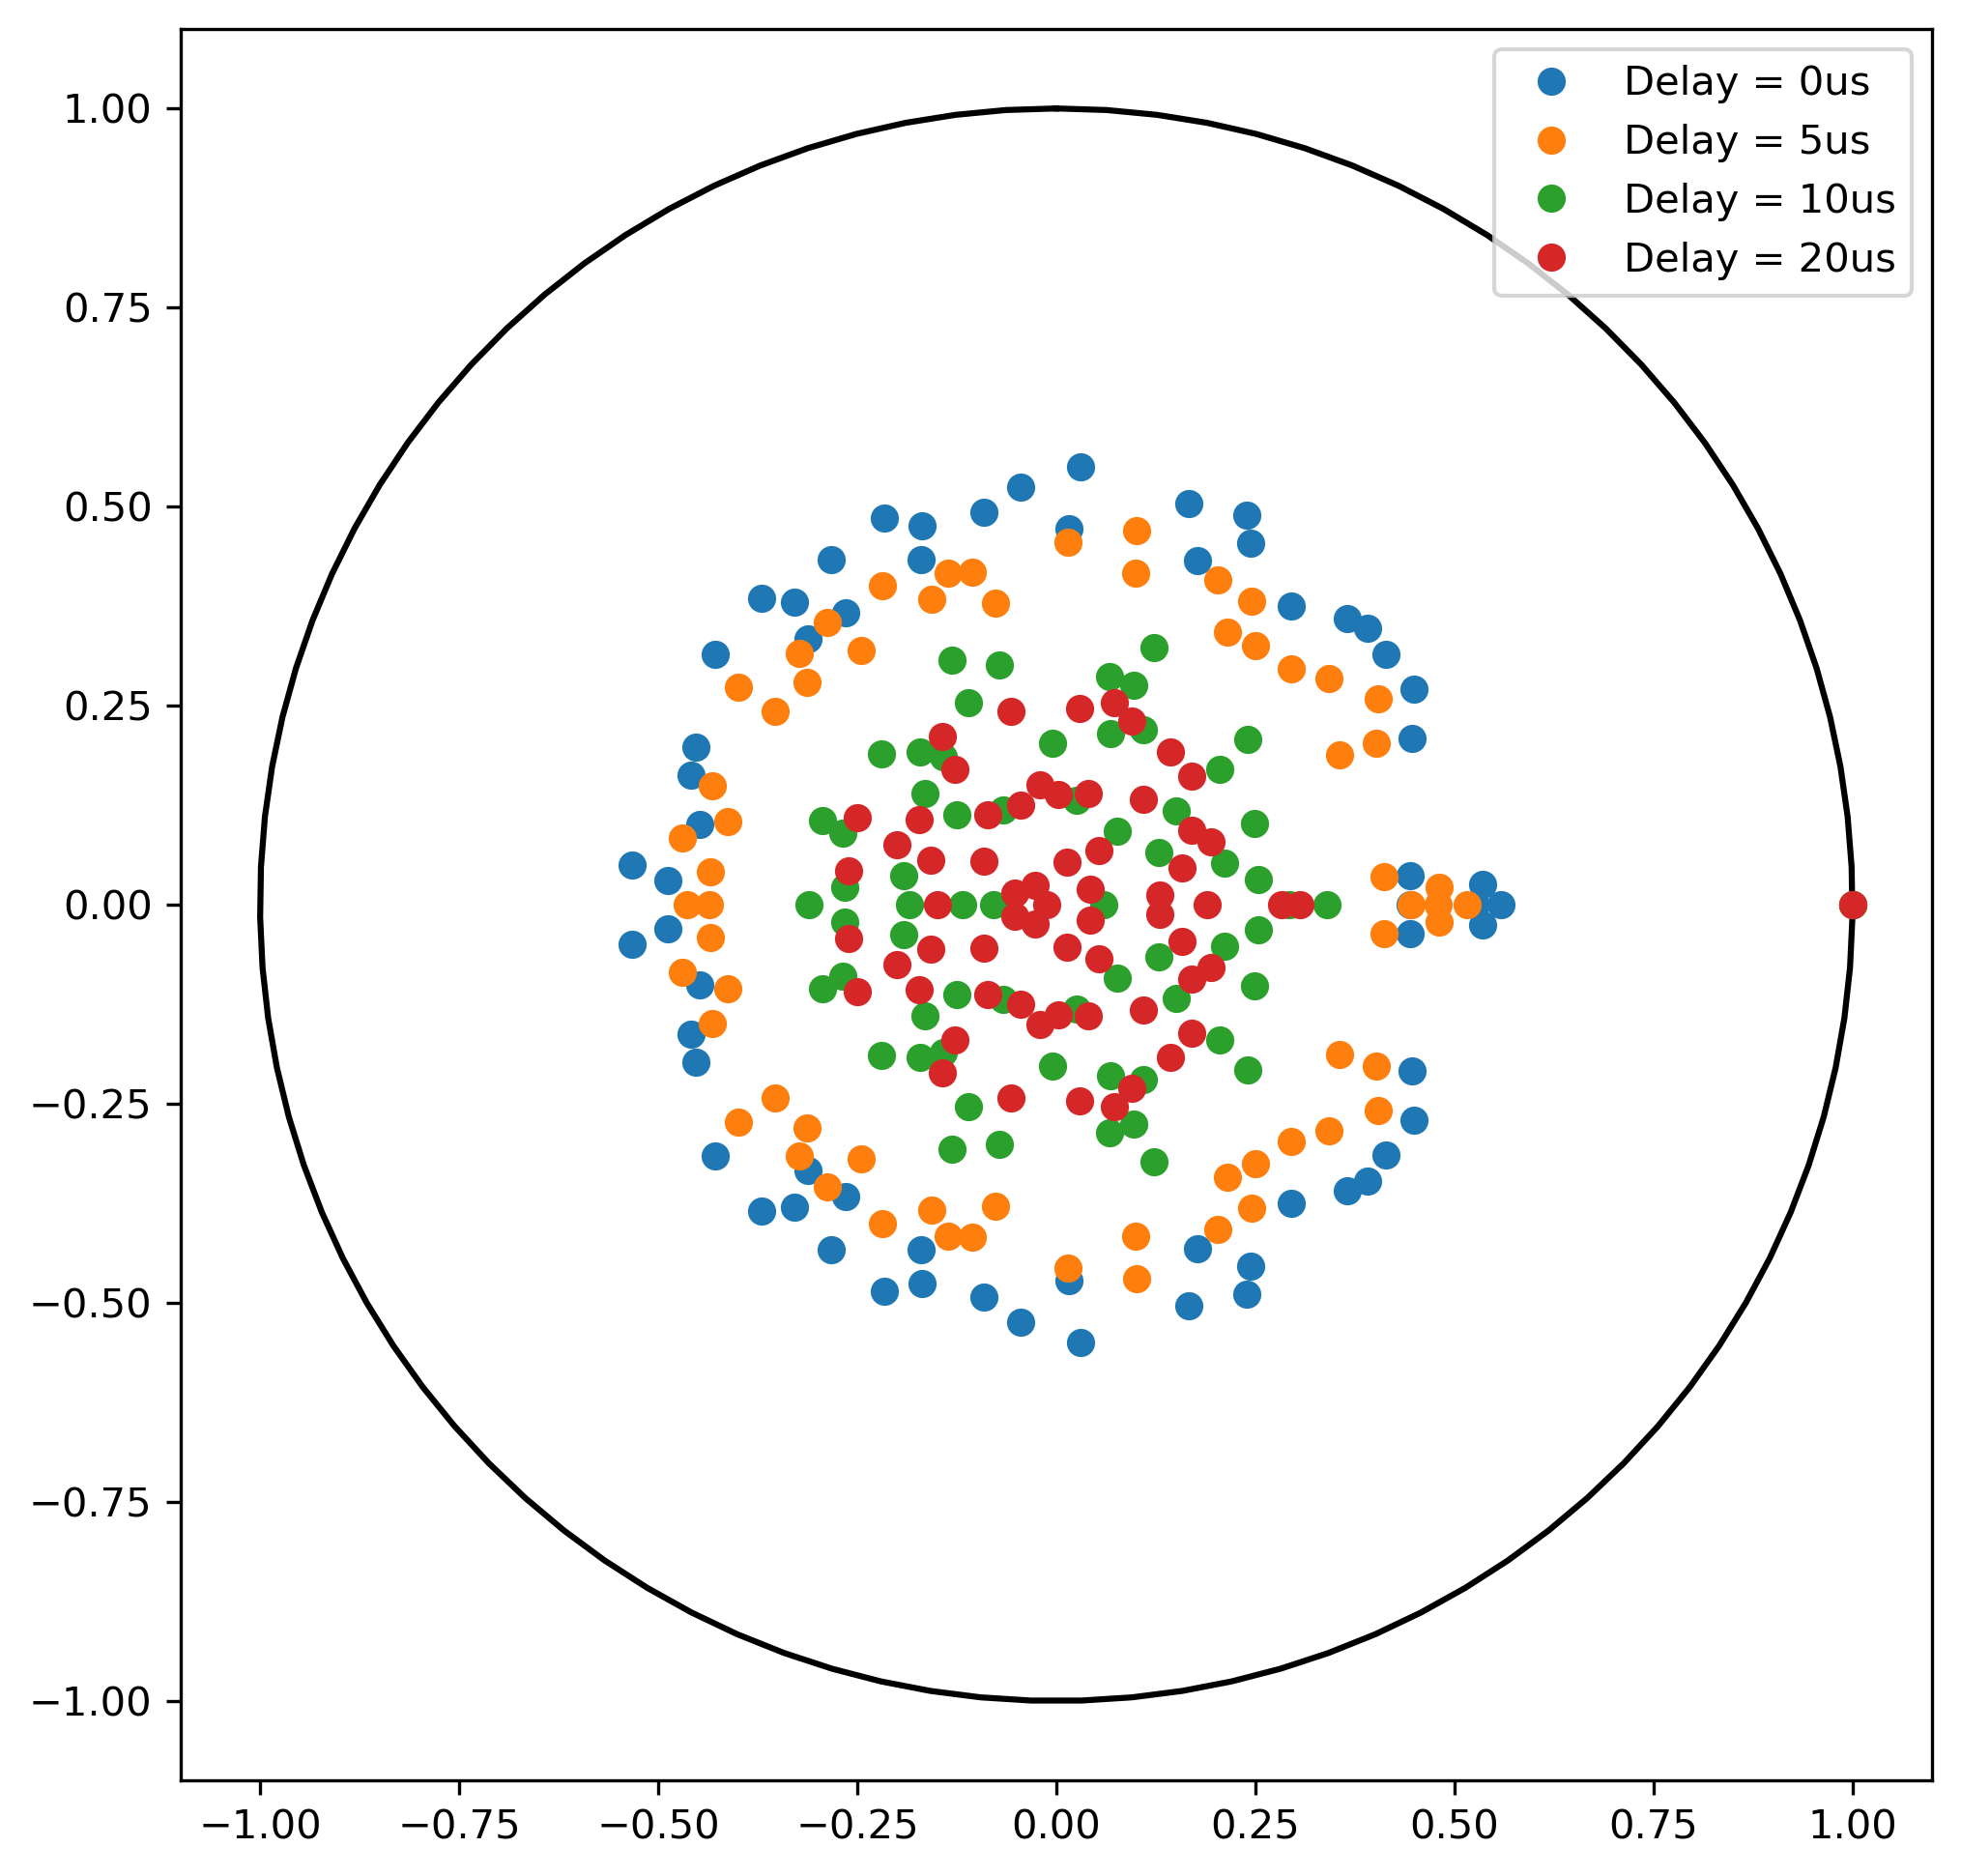

In [13]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

spectrum_list = [channel_spectrum(channel) for channel in data]

fig =plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

for spectrum in spectrum_list:
    plt.plot(spectrum[:,0], spectrum[:,1], "o")

plt.legend(["_", "Delay = 0us", "Delay = 5us", "Delay = 10us", "Delay = 20us", "Delay = 30us"])
plt.show()

In [14]:
c_list = [np.real(channel.c) for channel in data]
rank_list = [np.real(channel.rank) for channel in data]
eff_rank = [np.real(effective_rank(channel)) for channel in data]

In [15]:
print(c_list)
print(rank_list)
print(eff_rank)

[array([[0.1736]], dtype=float32), array([[0.3451]], dtype=float32), array([[0.248]], dtype=float32), array([[0.1076]], dtype=float32)]
[8, 9, 10, 10]
[array(3.3465), array(4.0716), array(7.426), array(9.4463)]


In [62]:
def spectrum_to_radial(spectrum):
    radial = tf.norm(spectrum, axis=1)
    return radial